In [2]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
ratings = pd.read_csv("data/movies/ratings.csv")

In [3]:
ratings.head()

,userId,movieId,rating,tstamp
0,206,4803,4.0,2003-04-07 13:52:01
1,5073,72731,4.0,2020-02-19 16:07:53
2,4739,91653,4.0,2020-12-28 15:35:58
3,535,3005,3.0,2008-12-26 05:38:11
4,465,4776,3.0,2008-08-13 20:22:36


In [4]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,6715,6716,6717,6718,6719,6720,6721,6722,6723,6724
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,3.0,4.0,5.0,3.0,4.0,4.5,NaN,4.0,2.5,...,5.0,NaN,5.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,3.0,NaN,2.5,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,6715,6716,6717,6718,6719,6720,6721,6722,6723,6724
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,3.0,4.0,5.0,3.0,4.0,4.5,0.0,4.0,2.5,...,5.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,3.0,0.0,2.5,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

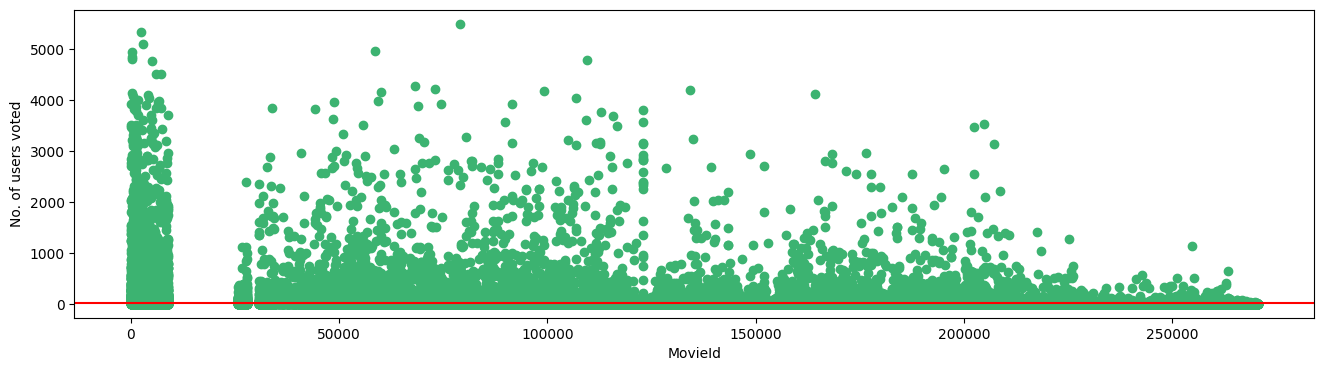

In [7]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [8]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

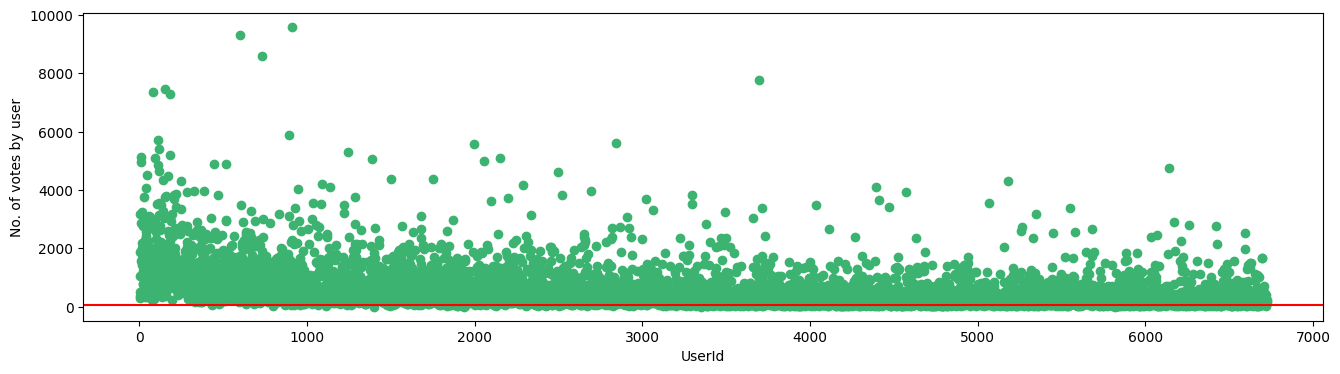

In [9]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [10]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,6714,6715,6716,6717,6718,6720,6721,6722,6723,6724
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,3.0,4.0,5.0,3.0,4.0,4.5,0.0,4.0,2.5,...,5.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,3.0,0.0,2.5,0.0,2.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.5,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [12]:
csr_sample = csr_matrix(sample)
print(csr_sample)


  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [13]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [14]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [15]:
def get_movie_recommendation(movie_id):
    n_movies_to_recommend = 10
    # Assuming movies dataset contains a column 'movieId'
    movie_idx = final_dataset[final_dataset.index == int(movie_id)].index[0]
    distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend + 1)
    rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    recommend_frame = []
    for val in rec_movie_indices:
        # Assuming 'movieId' is the index of the final_dataset DataFrame
        recommend_frame.append({'movieId': final_dataset.iloc[val[0]].name, 'Distance': val[1]})
    df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend + 1))
    return df

In [16]:
get_movie_recommendation('12')

,movieId,Distance
1,1595,0.649949
2,45,0.644243
3,3476,0.643238
4,2265,0.642333
5,2752,0.636193
6,1199,0.633833
7,3607,0.628261
8,1297,0.607782
9,806,0.605709
10,4298,0.600204
